### Training Set - 
The first two columns in the training set file represent the two attributes, Attribute 1 (a1) and Attribute 2 (a2). The third column (column C) is the class label associated with each data point in the training set. There are two class labels: 1 and 2. In total, there are 30 data points/observations in the training set. You need to build a decision tree using this file. Use all 30 points for training. Construct the decision tree step-by-step as the following questions suggest.

### Validation Set - 
The first two columns in the validation set file represent the two attributes, Attribute 1 (a1) and Attribute 2 (a2). The third column (column C) is the class label associated with each data point in the validation set. The fourth column is the class label as predicted by the decision tree model. There are two class labels: 1 and 2. In total, there are 4 data points/observations in the validation set. This data file will be needed to check the accuracy of pruned trees.

Please note that you mustn't use DecisionTreeClassifier or write codes to solve the following questions. You can use Excel to split and filter the data set according to the test conditions specified in the questions. The DecisionTreeClassifier function uses a slightly different test on each node, and hence, the final answer to the following questions may not match. 

Please use the following hyperparameters to solve the following questions:

max_depth = 20
min_samples_split = 10
min_samples_leaf = 5
Homogeneity measure = gini 

Note: (13, 5), written on a node, implies that 13 data points belong to class label 1, and 5 data points belong to class label 2.

In [2]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [4]:
train=pd.read_csv('https://cdn.upgrad.com/UpGrad/temp/50d07e36-7382-401a-9de8-ffbfdd464654/Training_Set.csv')
validation=pd.read_csv('https://cdn.upgrad.com/UpGrad/temp/7ce4563e-24e8-45a1-8f2d-f6a844caa747/Validation_Set.csv')

In [5]:
train.head()

,Attribute 1 (a1),Attribute 2 (a2),Class Label
0,2,11,2
1,2,13,2
2,2,15,2
3,2,27,1
4,2,39,1


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Attribute 1 (a1)  30 non-null     int64
 1   Attribute 2 (a2)  30 non-null     int64
 2   Class Label       30 non-null     int64
dtypes: int64(3)
memory usage: 848.0 bytes


In [25]:
train['Attribute 1 (a1)'].value_counts()

12    5
10    5
8     5
6     5
4     5
2     5
Name: Attribute 1 (a1), dtype: int64

In [27]:
train.groupby('Class Label')['Attribute 2 (a2)'].value_counts()

Class Label  Attribute 2 (a2)
1            13                  5
             11                  4
             15                  4
             27                  1
             39                  1
2            27                  5
             39                  5
             11                  2
             15                  2
             13                  1
Name: Attribute 2 (a2), dtype: int64

In [13]:
X_train=train.drop('Class Label',axis=1)
y_train=train['Class Label']

In [15]:
y_train

0     2
1     2
2     2
3     1
4     1
5     1
6     1
7     1
8     2
9     2
10    1
11    1
12    1
13    2
14    2
15    1
16    1
17    1
18    2
19    2
20    1
21    1
22    1
23    2
24    2
25    2
26    1
27    2
28    2
29    2
Name: Class Label, dtype: int64

In [20]:
dt_default = DecisionTreeClassifier(max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
features = list(X_train.columns[0:])
features

['Attribute 1 (a1)', 'Attribute 2 (a2)']

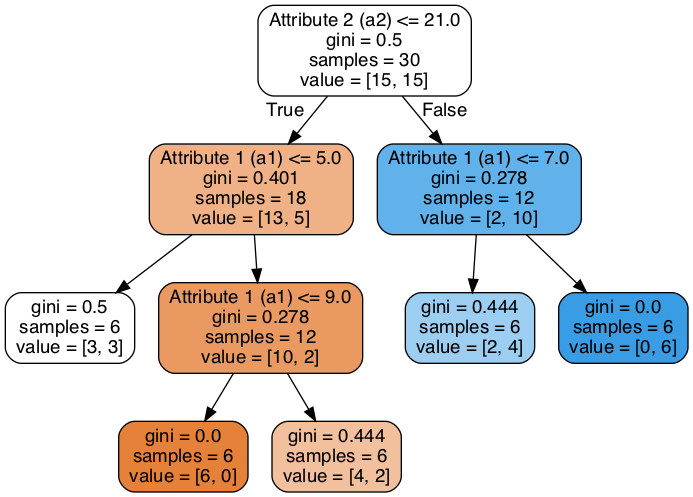

In [22]:
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())